In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [9]:
# Load data
train_data = np.loadtxt('trainMatrixModified.txt')
test_data = np.loadtxt('testMatrixModified.txt')
train_labels_str = np.loadtxt('trainClasses.txt', dtype=str, delimiter='\t', usecols=1)
test_labels_str = np.loadtxt('testClasses.txt', dtype=str, delimiter='\t', usecols=1)
vocab = open('modifiedterms.txt').read().splitlines()

In [10]:
# Convert label strings to 0/1
train_labels = np.array([1 if l == '1' else 0 for l in train_labels_str])
test_labels = np.array([1 if l == '1' else 0 for l in test_labels_str])

In [11]:
# Phase I
# Multinomial Naive Bayes (MNB) from scratch
def trainMultinomialNB(train_data, train_labels):
    """
    Train the Multinomial Naive Bayes classifier following the pseudocode in the textbook.
    """
    # Extract vocabulary from training data
    vocabulary = np.unique(np.concatenate(train_data))
    
    # Count total documents 
    N = train_data.shape[1]
    
    # Initialize priors and conditional probs
    priors = np.zeros(2)
    condprob = np.zeros((len(vocabulary), 2))
    
    # Loop over classes
    for c in [0, 1]:
        # Count documents in class c
        N_c = np.sum(train_labels == c)
        
        # Calculate prior
        priors[c] = N_c / N
        
        # Get docs of class c
        data_c = [train_data[:,i] for i in np.where(train_labels == c)[0]]
        
        # Concatenate text 
        text_c = np.concatenate(data_c)
        
        # Loop over terms
        for i, term in enumerate(vocabulary):
            # Count occurences and calc conditional prob
            T_ct = np.sum(text_c == term) 
            condprob[i, c] = (T_ct + 1) / (np.sum(text_c) + len(vocabulary))
                
    return vocabulary, priors, condprob

In [21]:
def applyMultinomialNB(test_data, vocab, priors, condprob):
    preds = []
    for doc in test_data.T:
        scores = np.log(priors)
        for term in np.unique(doc):
            term_idx = np.where(vocab == term)[0]  # Get index of term in vocabulary
            if len(term_idx) > 0:  # Check if term exists in vocabulary
                term_idx = term_idx[0]  # Get scalar index
                scores += np.log(condprob[term_idx, :]) * doc[term_idx]
        preds.append(np.argmax(scores))
    return preds

In [19]:
# def applyMultinomialNB(test_data, vocab, priors, condprob):
#     preds = []
#     for doc in test_data.T:
#         scores = np.log(priors)
#         for term in np.unique(doc):
#             term_idx = np.where(vocab == term)[0]  # Get index of term in vocabulary
#             print("Term:", term)
#             print("Term index:", term_idx)
#             print("Shape of condprob:", condprob.shape)
#             print("Shape of vocab:", vocab.shape)
#             if len(term_idx) > 0:  # Check if term exists in vocabulary
#                 term_idx = term_idx[0]  # Get scalar index
#                 scores += np.log(condprob[term_idx, :]) * doc[vocab == term]
#             else:
#                 print("Term not found in vocabulary:", term)

#         preds.append(np.argmax(scores))
#     return preds

In [22]:
# Train and apply MNB
vocabulary, priors, condprob = trainMultinomialNB(train_data, train_labels)
nb_preds = applyMultinomialNB(test_data, vocabulary, priors, condprob)

In [23]:
# k-Nearest Neighbors (kNN) using scikit-learn
knn_clf = KNeighborsClassifier(n_neighbors=5)  # Choose a reasonable value for k
knn_clf.fit(train_data.T, train_labels)
knn_preds = knn_clf.predict(test_data.T)

In [24]:
# Support Vector Machine (SVM) using scikit-learn
svm_clf = SVC(kernel='linear')
svm_clf.fit(train_data.T, train_labels)
svm_preds = svm_clf.predict(test_data.T)

In [25]:

# Evaluate classifiers
print("Accuracy Scores:")
print(f"Naive Bayes: {accuracy_score(test_labels, nb_preds):.3f}")
print(f"k-NN: {accuracy_score(test_labels, knn_preds):.3f}")
print(f"SVM: {accuracy_score(test_labels, svm_preds):.3f}")

Accuracy Scores:
Naive Bayes: 0.510
k-NN: 0.820
SVM: 0.980


In [26]:
# Confusion matrices
nb_cm = confusion_matrix(test_labels, nb_preds)
knn_cm = confusion_matrix(test_labels, knn_preds)
svm_cm = confusion_matrix(test_labels, svm_preds)

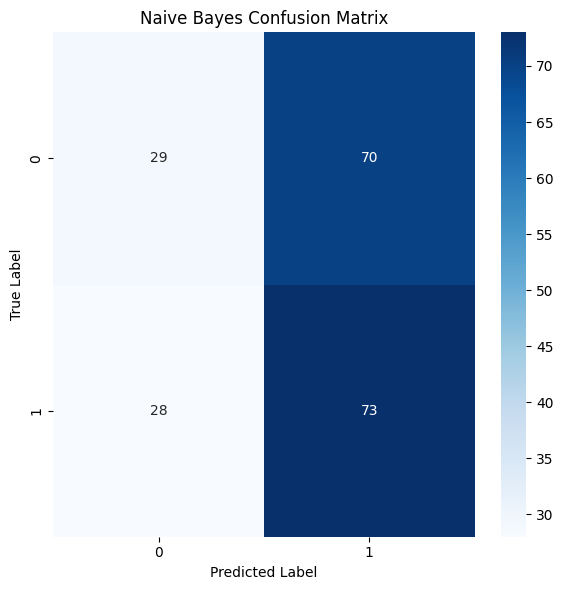

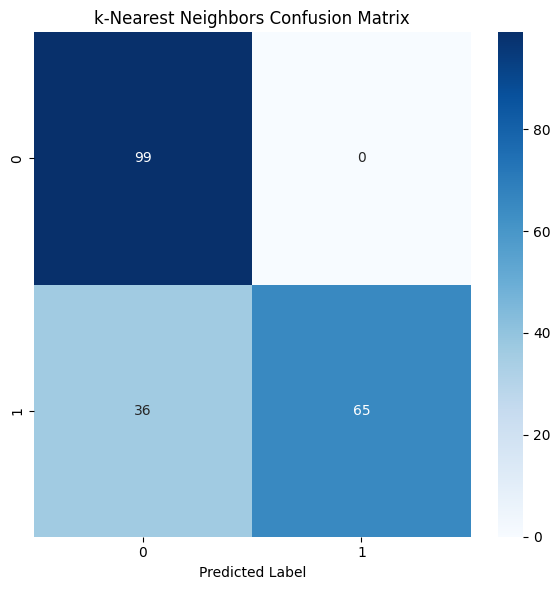

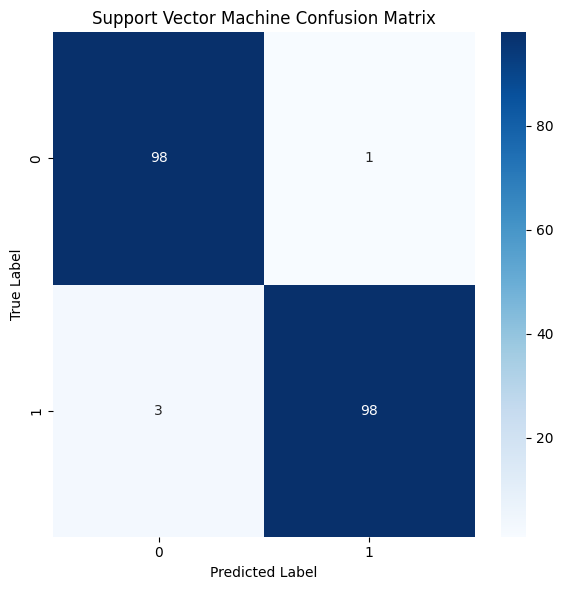

In [33]:
import seaborn as sns

# Naive Bayes Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.savefig("NB_CM.png")
plt.show()

# k-Nearest Neighbors Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues')
plt.title("k-Nearest Neighbors Confusion Matrix")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.savefig("KNN_CM.png")
plt.show()

# Support Vector Machine Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Support Vector Machine Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.savefig("SVM_CM.png")
plt.show()


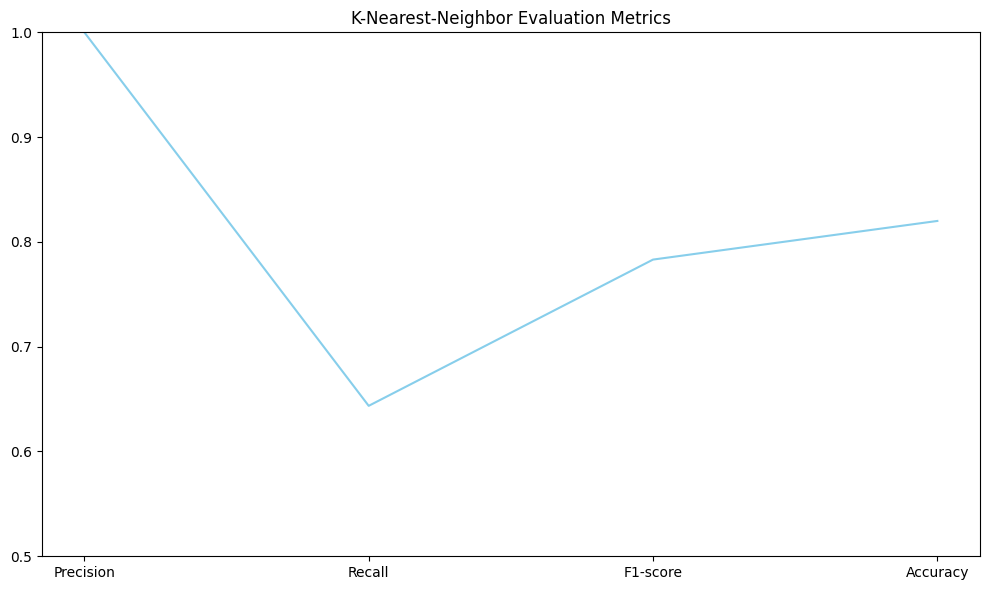

In [48]:

# Evaluation metrics for k-Nearest Neighbors
knn_precision = precision_score(test_labels, knn_preds)
knn_recall = recall_score(test_labels, knn_preds)
knn_f1_score = f1_score(test_labels, knn_preds)
knn_accuracy = accuracy_score(test_labels, knn_preds)

# Plotting the graph
plt.figure(figsize=(10, 6))
metrics = ['Precision', 'Recall', 'F1-score', 'Accuracy']
values = [knn_precision, knn_recall, knn_f1_score, knn_accuracy]
plt.plot(metrics, values, color='skyblue')
plt.title("K-Nearest-Neighbor Evaluation Metrics")
plt.ylim(0.50, 1)  # Setting y-axis limit to better visualize scores
plt.tight_layout()
plt.savefig("KNN_EM.png")
plt.show()


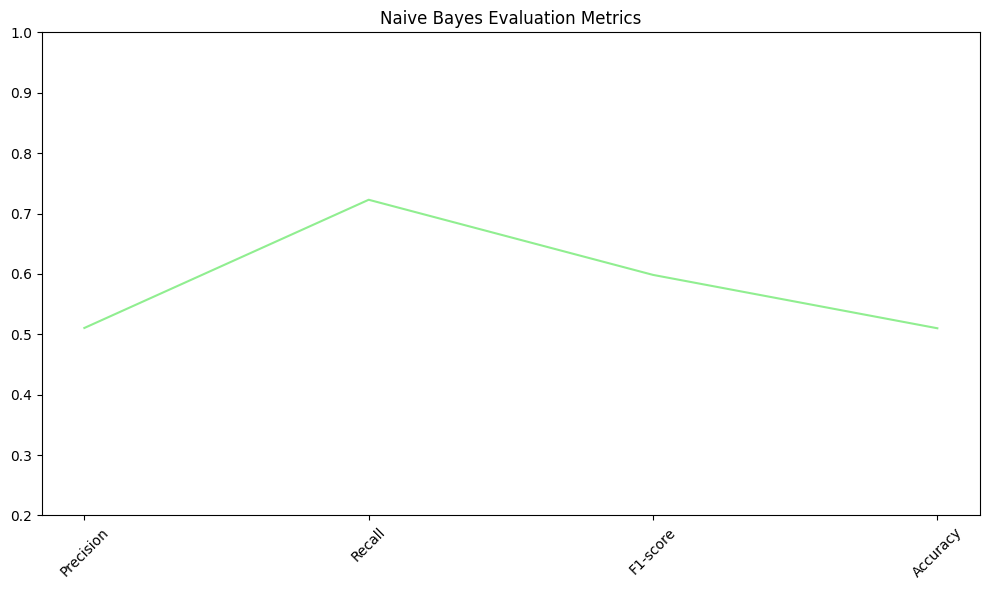

In [52]:
# Evaluation metrics for Naive Bayes
nb_precision = precision_score(test_labels, nb_preds)
nb_recall = recall_score(test_labels, nb_preds)
nb_f1_score = f1_score(test_labels, nb_preds)
nb_accuracy = accuracy_score(test_labels, nb_preds)

# Plotting the graph
plt.figure(figsize=(10, 6))
metrics = ['Precision', 'Recall', 'F1-score', 'Accuracy']
values = [nb_precision, nb_recall, nb_f1_score, nb_accuracy]
plt.plot(metrics, values, color='lightgreen')
plt.title("Naive Bayes Evaluation Metrics")
plt.ylim(0.20, 1)  # Setting y-axis limit to better visualize scores
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("NB_EM.png")
plt.show()


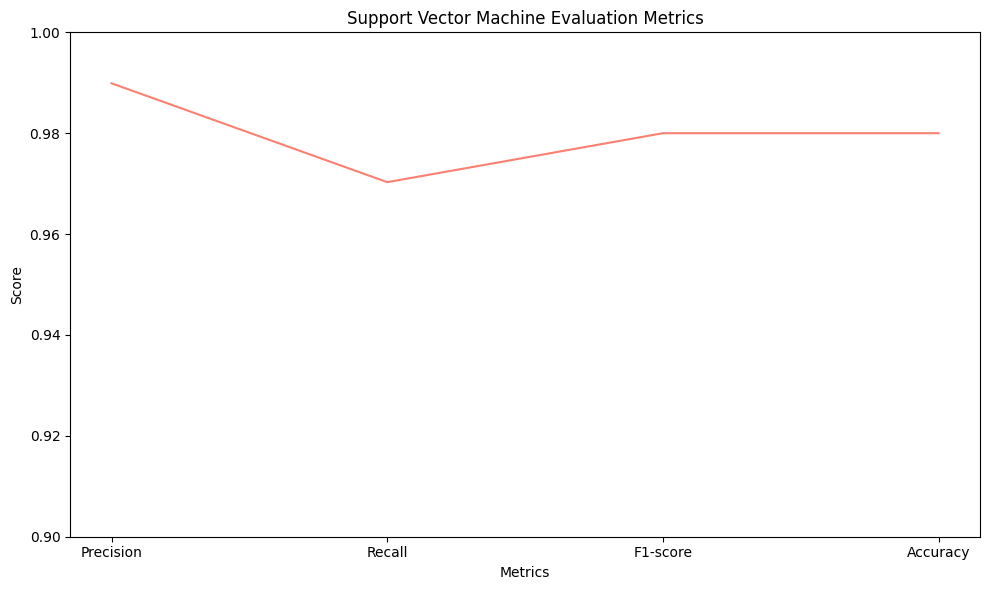

In [47]:
# Evaluation metrics for Support Vector Machine (SVM)
svm_precision = precision_score(test_labels, svm_preds)
svm_recall = recall_score(test_labels, svm_preds)
svm_f1_score = f1_score(test_labels, svm_preds)
svm_accuracy = accuracy_score(test_labels, svm_preds)

# Plotting the graph
plt.figure(figsize=(10, 6))
metrics = ['Precision', 'Recall', 'F1-score', 'Accuracy']
values = [svm_precision, svm_recall, svm_f1_score, svm_accuracy]
plt.plot(metrics, values, color='salmon')
plt.title("Support Vector Machine Evaluation Metrics")
plt.ylim(0.90, 1)  # Setting y-axis limit to better visualize scores
plt.tight_layout()
plt.savefig("SVM_EM.png")
plt.show()


In [60]:
def convert_confusion_matrix_to_space_separated(conf_matrix):
    conf_matrix_str = '\n'.join([' '.join(map(str, row)) for row in conf_matrix])
    return conf_matrix_str


In [63]:
# Phase II
# Evaluation metrics

# Naive Bayes
nb_precision = precision_score(test_labels, nb_preds)
nb_recall = recall_score(test_labels, nb_preds)
nb_f1_score = f1_score(test_labels, nb_preds)
with open('NB.txt', 'w') as nb_file:
    nb_file.write(f"Accuracy: {nb_accuracy:.3f}\n")
    nb_file.write(f"Precision: {nb_precision:.3f}\n")
    nb_file.write(f"Recall: {nb_recall:.3f}\n")
    nb_file.write(f"F1-score: {nb_f1_score:.3f}\n")
    nb_file.write("Confusion Matrix:\n")
    nb_file.write(convert_confusion_matrix_to_space_separated(nb_cm))

# k-Nearest Neighbors
knn_precision = precision_score(test_labels, knn_preds)
knn_recall = recall_score(test_labels, knn_preds)
knn_f1_score = f1_score(test_labels, knn_preds)
with open('KNN.txt', 'w') as knn_file:
    knn_file.write(f"Accuracy: {knn_accuracy: .3f}\n")
    knn_file.write(f"Precision: {knn_precision:.3f}\n")
    knn_file.write(f"Recall: {knn_recall:.3f}\n")
    knn_file.write(f"F1-score: {knn_f1_score:.3f}\n")
    knn_file.write("Confusion Matrix:\n")
    knn_file.write(convert_confusion_matrix_to_space_separated(knn_cm))


# Support Vector Machine
svm_precision = precision_score(test_labels, svm_preds)
svm_recall = recall_score(test_labels, svm_preds)
svm_f1_score = f1_score(test_labels, svm_preds)
with open('SVM.txt', 'w') as svm_file:
    svm_file.write(f"Accuracy: {svm_accuracy:.3f}\n")
    svm_file.write(f"Precision: {svm_precision:.3f}\n")
    svm_file.write(f"Recall: {svm_recall:.3f}\n")
    svm_file.write(f"F1-score: {svm_f1_score:.3f}\n")
    svm_file.write("Confusion Matrix:\n")
    svm_file.write(convert_confusion_matrix_to_space_separated(svm_cm))

